In [81]:
%pylab inline
from PIL import Image
ImagenTotal = numpy.asarray(Image.open('Rst/SectionC.png'))
#here you choose in between small, medium, large or extra
ImagenTemplate = numpy.asarray(Image.open('Rst/SSC/D.png'))

Populating the interactive namespace from numpy and matplotlib


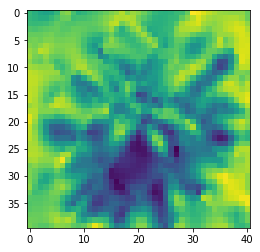

In [82]:
#notice that we work with one band
imagen = ImagenTotal[:,:,1]
arbol = ImagenTemplate[:,:,1]
#print(arbol)
imshow(arbol)

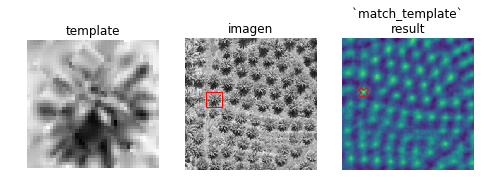

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

result = match_template(imagen, arbol)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box-forced')

ax1.imshow(arbol, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(imagen, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('imagen')
# highlight matched region
harbol, warbol = arbol.shape
rect = plt.Rectangle((x, y), warbol, harbol, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'X', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

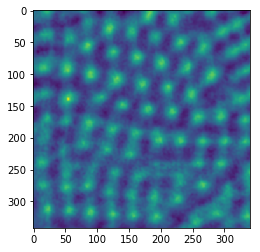

In [84]:
#closer look of the match template
imshow(result);
figure(figsize = (10,10));

In [85]:
#filter results to match similar trees
resultadosfiltrados = np.where(result>0.85)
resultadomaximo = np.where(result>0.85)

In [86]:
#some parameters for the figure layout
print(shape(resultadosfiltrados))
print(shape(result))
print(shape(imagen))

(2, 5)
(342, 341)
(381, 381)


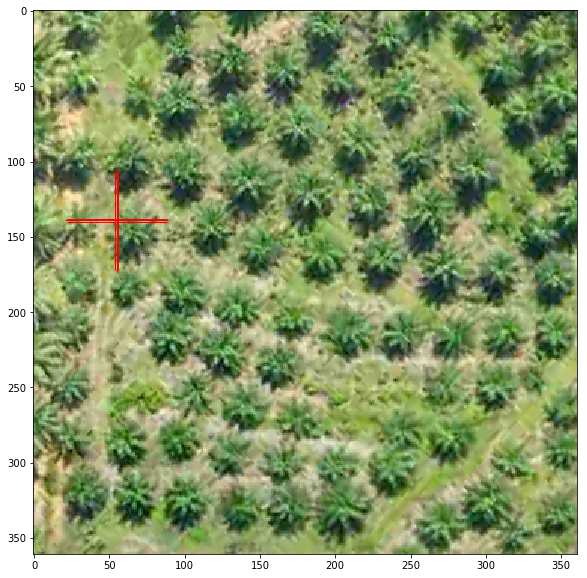

In [92]:
#show the interpreted results plus the best match
for punto in range(shape(resultadosfiltrados)[1]):
    plot(resultadosfiltrados[1][punto], resultadosfiltrados[0][punto], '+', 
         markeredgecolor='r', markerfacecolor='none', markersize=100)
    
plot(resultadomaximo[1][0], resultadomaximo[0][0], '+', 
         markeredgecolor='r', markerfacecolor='r', markersize=100)

imshow(ImagenTotal[10:-10,10:-10,:])
figsize(10,10)